In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
cm=pd.read_csv('child-mortality.csv')
cm.head()

,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76


In [3]:
cm.rename(columns={'Entity':'year'}, inplace= True)

In [4]:
cm.rename(columns={'year':'country'}, inplace= True)

In [5]:
immune=pd.read_excel('immunization.xlsx')
immune.head()

,unicef_region,iso3,country,vaccine,2024,2023,2022,2021,2020,2019,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,ROSA,AFG,Afghanistan,BCG,68.0,68.0,69.0,65.0,72.0,74.0,...,38.0,40.0,27.0,18.0,17.0,11.0,10.0,10.0,NaN,NaN
1,ECAR,ALB,Albania,BCG,99.0,99.0,99.0,99.0,98.0,99.0,...,94.0,92.0,92.0,92.0,92.0,90.0,90.0,92.0,93.0,93.0
2,MENA,DZA,Algeria,BCG,98.0,99.0,98.0,98.0,99.0,99.0,...,96.0,96.0,93.0,88.0,86.0,NaN,NaN,NaN,NaN,NaN
3,ESAR,AGO,Angola,BCG,68.0,80.0,67.0,61.0,62.0,72.0,...,47.0,32.0,29.0,32.0,28.0,28.0,25.0,NaN,NaN,NaN
4,LACR,ARG,Argentina,BCG,81.0,69.0,81.0,80.0,75.0,85.0,...,92.0,91.0,94.0,99.0,90.0,78.0,70.0,77.0,70.0,62.0


In [6]:
# Melt the dataframe
vaccine= immune.melt(id_vars=['country','unicef_region','iso3','vaccine'], var_name='Year', value_name='BCG_Vaccine')

In [7]:
vaccine.head()

,country,unicef_region,iso3,vaccine,Year,BCG_Vaccine
0,Afghanistan,ROSA,AFG,BCG,2024,68.0
1,Albania,ECAR,ALB,BCG,2024,99.0
2,Algeria,MENA,DZA,BCG,2024,98.0
3,Angola,ESAR,AGO,BCG,2024,68.0
4,Argentina,LACR,ARG,BCG,2024,81.0


In [8]:
cm['Year'].dtype

dtype('int64')

In [9]:
vaccine['Year']=vaccine['Year'].astype('int')

In [10]:
df=pd.merge(vaccine, cm, on =['country','Year'], how='inner')

In [11]:
df.head()

,country,unicef_region,iso3,vaccine,Year,BCG_Vaccine,Code,Child mortality rate
0,Afghanistan,ROSA,AFG,BCG,2023,68.0,AFG,5.55
1,Albania,ECAR,ALB,BCG,2023,99.0,ALB,0.94
2,Algeria,MENA,DZA,BCG,2023,99.0,DZA,2.20
3,Angola,ESAR,AGO,BCG,2023,80.0,AGO,6.40
4,Argentina,LACR,ARG,BCG,2023,69.0,ARG,0.96


In [12]:
#narrow dataset down to Nigeria
country = ['Nigeria',]
df= df[df['country'].isin(country)]

In [13]:
df = df[['Year', 'BCG_Vaccine', 'Child mortality rate']]

In [14]:
df.head()

,Year,BCG_Vaccine,Child mortality rate
98,2023,71.0,10.49
247,2022,67.0,10.81
396,2021,71.0,11.13
545,2020,74.0,11.44
694,2019,75.0,11.75


In [15]:
df.shape

(44, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 98 to 6481
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  44 non-null     int32  
 1   BCG_Vaccine           43 non-null     float64
 2   Child mortality rate  44 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.2 KB


In [17]:
df.describe()

,Year,BCG_Vaccine,Child mortality rate
count,44.000000,43.000000,44.000000
mean,2001.500000,51.697674,16.830455
std,12.845233,16.039438,3.833831
min,1980.000000,16.000000,10.490000
25%,1990.750000,42.500000,13.050000
50%,2001.500000,53.000000,17.395000
75%,2012.250000,63.000000,20.742500
max,2023.000000,80.000000,21.320000


In [18]:
df.dropna(inplace=True)

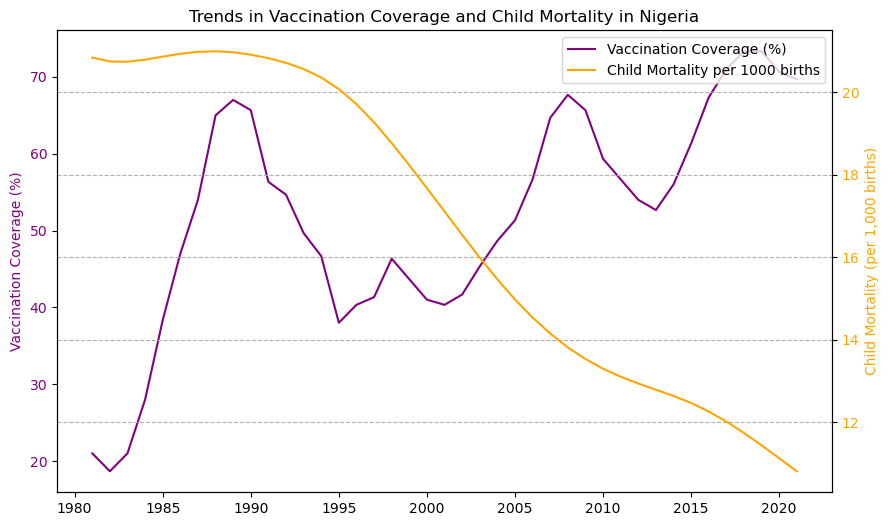

In [19]:
#plot BCG vaccination against child mortality rate
df['vaccination_smooth'] = df['BCG_Vaccine'].rolling(window=3).mean()
df['mortality_smooth'] = df['Child mortality rate'].rolling(window=3).mean()

plt.figure(figsize=(10,6))
l1,=plt.plot(df['Year'], df['vaccination_smooth'], color='purple',label='Vaccination Coverage (%)')
plt.ylabel('Vaccination Coverage (%)', color='purple')
plt.tick_params(axis='y', labelcolor='purple')

plt.twinx()
l2,=plt.plot(df['Year'], df['mortality_smooth'], color='orange', label='Child Mortality per 1000 births')
plt.ylabel('Child Mortality (per 1,000 births)', color='orange')
plt.tick_params(axis='y', labelcolor='orange')

lines=[l1,l2]
labels=[line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper right')

plt.grid(True,  linestyle='--')
plt.title('Trends in Vaccination Coverage and Child Mortality in Nigeria')
plt.show()

CORRELATION AND REGRESSION ANALYSIS

In [20]:
df[['BCG_Vaccine', 'Child mortality rate']].corr()

,BCG_Vaccine,Child mortality rate
BCG_Vaccine,1.000000,-0.612807
Child mortality rate,-0.612807,1.000000


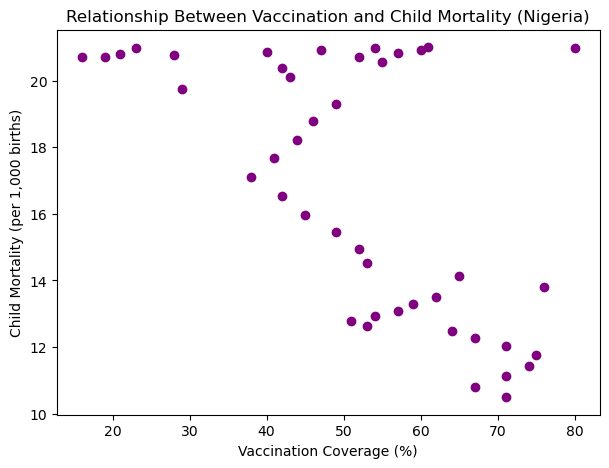

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df['BCG_Vaccine'], df['Child mortality rate'], color='purple')
plt.title('Relationship Between Vaccination and Child Mortality (Nigeria)')
plt.xlabel('Vaccination Coverage (%)')
plt.ylabel('Child Mortality (per 1,000 births)')
plt.show()

In [22]:
corr, p_value=stats.pearsonr(df['BCG_Vaccine'],df['Child mortality rate'])
print(f"Correlation coefficient (r) :{corr:.3f}")
print(f"p-value : {p_value : .5f}")

Correlation coefficient (r) :-0.613
p-value :  0.00001


In [23]:
X=df['BCG_Vaccine']
Y=df['Child mortality rate']

X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Child mortality rate   R-squared:                       0.376
Model:                              OLS   Adj. R-squared:                  0.360
Method:                   Least Squares   F-statistic:                     24.66
Date:                  Sat, 01 Nov 2025   Prob (F-statistic):           1.25e-05
Time:                          13:52:10   Log-Likelihood:                -107.96
No. Observations:                    43   AIC:                             219.9
Df Residuals:                        41   BIC:                             223.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.2621      1.

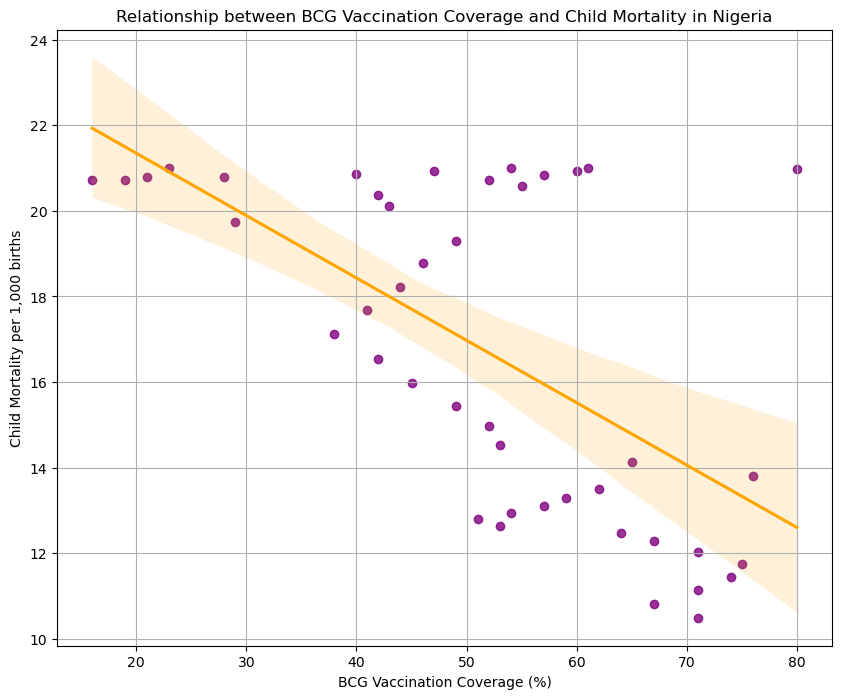

In [24]:
plt.figure(figsize=(10,8))
sns.regplot(x="BCG_Vaccine", y="Child mortality rate", data=df, color="purple", line_kws={'color':'orange'})
plt.title("Relationship between BCG Vaccination Coverage and Child Mortality in Nigeria")
plt.xlabel("BCG Vaccination Coverage (%)")
plt.ylabel("Child Mortality per 1,000 births")
plt.grid(True)
plt.show()